In [70]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [64]:
data=[[2,0,81],[4,4,93],[6,2,91],[8,3,97]]

x1=[x_row1[0] for x_row1 in data]
x2=[x_row2[1] for x_row2 in data]
y_data=[y_row[2] for y_row in data]


#임의의 기울기 , 절편값 생성
a1=tf.Variable(tf.random_uniform([1],0,10,dtype=tf.float64,seed=0))
a2=tf.Variable(tf.random_uniform([1],0,10,dtype=tf.float64,seed=0))
b=tf.Variable(tf.random_uniform([1],0,100,dtype=tf.float64,seed=0))

In [65]:
#회귀식

y=a1*x1+a2*x2+b
y

<tf.Tensor 'add_14:0' shape=(4,) dtype=float64>

In [66]:
#평균제곱근오차 
rmse=tf.sqrt(tf.reduce_mean(tf.square(y-y_data)))

learning_rate=0.1

#경사하강법 옵티마이저 및, 학습기계 생성
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.1)
train=optimizer.minimize(rmse)

In [67]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(3001):
        sess.run(train)
        if step%100==0:
            print("Epoch : %.f, RMSE=%.04f, 기울기 a1 : %.4f, 기울기 a2 : %.4f, y 절편 b : %.4f" %(step,sess.run(rmse),sess.run(a1),sess.run(a2),sess.run(b)))

Epoch : 0, RMSE=49.1842, 기울기 a1 : 7.5270, 기울기 a2 : 7.8160, y 절편 b : 80.5980
Epoch : 100, RMSE=1.8368, 기울기 a1 : 1.1306, 기울기 a2 : 2.1316, y 절편 b : 78.5119
Epoch : 200, RMSE=1.8370, 기울기 a1 : 1.1879, 기울기 a2 : 2.1487, y 절편 b : 78.1057
Epoch : 300, RMSE=1.8370, 기울기 a1 : 1.2122, 기울기 a2 : 2.1571, y 절편 b : 77.9352
Epoch : 400, RMSE=1.8370, 기울기 a1 : 1.2226, 기울기 a2 : 2.1607, y 절편 b : 77.8636
Epoch : 500, RMSE=1.8370, 기울기 a1 : 1.2269, 기울기 a2 : 2.1622, y 절편 b : 77.8335
Epoch : 600, RMSE=1.8370, 기울기 a1 : 1.2288, 기울기 a2 : 2.1628, y 절편 b : 77.8208
Epoch : 700, RMSE=1.8370, 기울기 a1 : 1.2295, 기울기 a2 : 2.1631, y 절편 b : 77.8155
Epoch : 800, RMSE=1.8370, 기울기 a1 : 1.2299, 기울기 a2 : 2.1632, y 절편 b : 77.8133
Epoch : 900, RMSE=1.8370, 기울기 a1 : 1.2300, 기울기 a2 : 2.1632, y 절편 b : 77.8124
Epoch : 1000, RMSE=1.8370, 기울기 a1 : 1.2301, 기울기 a2 : 2.1633, y 절편 b : 77.8120
Epoch : 1100, RMSE=1.8370, 기울기 a1 : 1.2301, 기울기 a2 : 2.1633, y 절편 b : 77.8118
Epoch : 1200, RMSE=1.8370, 기울기 a1 : 1.2301, 기울기 a2 : 2.1633, y 절편 b : 77.81

In [35]:
for x_1,x_2,y_ in zip(x1,x2,y_data):
    print("y : %s," " y_ : %.2f : " %(y_,1.2301*x_1+2.1633*x_2+77.8117))

y : 81, y_ : 80.27 : 
y : 93, y_ : 91.39 : 
y : 91, y_ : 89.52 : 
y : 97, y_ : 94.14 : 


## 다중회귀실습

몸무게,나이,혈중지방함량 데이터

In [74]:
dt=np.loadtxt("C:\\Users\\user\\Desktop\\Blood_fat.csv",delimiter=",")

In [76]:
dt,type(dt),len(dt),dt.shape

(array([[ 84.,  46., 354.],
        [ 73.,  20., 190.],
        [ 65.,  52., 405.],
        [ 70.,  30., 263.],
        [ 76.,  57., 451.],
        [ 69.,  25., 302.],
        [ 63.,  28., 288.],
        [ 72.,  36., 385.],
        [ 79.,  57., 402.],
        [ 75.,  44., 365.],
        [ 27.,  24., 209.],
        [ 89.,  31., 290.],
        [ 65.,  52., 346.],
        [ 57.,  23., 254.],
        [ 59.,  60., 395.],
        [ 69.,  48., 434.],
        [ 60.,  34., 220.],
        [ 79.,  51., 374.],
        [ 75.,  50., 308.],
        [ 82.,  34., 220.],
        [ 59.,  46., 311.],
        [ 67.,  23., 181.],
        [ 85.,  37., 274.],
        [ 55.,  40., 303.],
        [ 63.,  30., 244.]]),
 numpy.ndarray,
 25,
 (25, 3))

In [125]:
x1=[x[0] for x in dt]
x2=[x[1] for x in dt]
y_data=[y[2] for y in dt]

a1=tf.Variable(tf.random_uniform([1],0,10,dtype=tf.float64,seed=0))
a2=tf.Variable(tf.random_uniform([1],0,10,dtype=tf.float64,seed=0))
b=tf.Variable(tf.random_uniform([1],0,100,dtype=tf.float64,seed=0))

In [126]:
#회귀식

y=x1*a1+x2*a2+b
y

<tf.Tensor 'add_20:0' shape=(25,) dtype=float64>

In [145]:
#평균제곱근오차
rmse=tf.sqrt(tf.reduce_mean(tf.square(y-y_data)))

optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01)
train=optimizer.minimize(rmse)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(7001):
        sess.run(train)
        if step%100==0:
            print("Epoch : %.f, RMSE=%.04f, 기울기 a1 : %.4f, 기울기 a2 : %.4f, y 절편 b : %.4f" %(step,sess.run(rmse),sess.run(a1),sess.run(a2),sess.run(b)))
            
    a1=sess.run(a1)
    a2=sess.run(a2)
    b=sess.run(b)
    y=sess.run(y)

Epoch : 0, RMSE=586.3051, 기울기 a1 : 7.3734, 기울기 a2 : 7.6736, y 절편 b : 80.6803
Epoch : 100, RMSE=41.3953, 기울기 a1 : 0.4367, 기울기 a2 : 5.1183, y 절편 b : 80.5873
Epoch : 200, RMSE=41.3817, 기울기 a1 : 0.3906, 기울기 a2 : 5.1990, y 절편 b : 80.5854
Epoch : 300, RMSE=41.3816, 기울기 a1 : 0.3879, 기울기 a2 : 5.2037, y 절편 b : 80.5836
Epoch : 400, RMSE=41.3816, 기울기 a1 : 0.3878, 기울기 a2 : 5.2040, y 절편 b : 80.5818
Epoch : 500, RMSE=41.3816, 기울기 a1 : 0.3878, 기울기 a2 : 5.2040, y 절편 b : 80.5800
Epoch : 600, RMSE=41.3816, 기울기 a1 : 0.3878, 기울기 a2 : 5.2040, y 절편 b : 80.5783
Epoch : 700, RMSE=41.3816, 기울기 a1 : 0.3878, 기울기 a2 : 5.2040, y 절편 b : 80.5765
Epoch : 800, RMSE=41.3816, 기울기 a1 : 0.3879, 기울기 a2 : 5.2040, y 절편 b : 80.5747
Epoch : 900, RMSE=41.3816, 기울기 a1 : 0.3879, 기울기 a2 : 5.2040, y 절편 b : 80.5729
Epoch : 1000, RMSE=41.3816, 기울기 a1 : 0.3879, 기울기 a2 : 5.2040, y 절편 b : 80.5712
Epoch : 1100, RMSE=41.3816, 기울기 a1 : 0.3879, 기울기 a2 : 5.2040, y 절편 b : 80.5694
Epoch : 1200, RMSE=41.3816, 기울기 a1 : 0.3879, 기울기 a2 : 5.2041, y

In [151]:
for x_1,x_2,y_ in zip(x1,x2,y_data):
    print("y : %s," " y_ : %.2f : " %(y_,a1[0]*x_1+a2[0]*x_2+b[0]))

y : 354.0, y_ : 352.56 : 
y : 190.0, y_ : 212.96 : 
y : 405.0, y_ : 376.39 : 
y : 263.0, y_ : 263.84 : 
y : 451.0, y_ : 406.70 : 
y : 302.0, y_ : 237.43 : 
y : 288.0, y_ : 250.71 : 
y : 385.0, y_ : 295.84 : 
y : 402.0, y_ : 407.86 : 
y : 365.0, y_ : 338.65 : 
y : 209.0, y_ : 215.88 : 
y : 290.0, y_ : 276.44 : 
y : 346.0, y_ : 376.39 : 
y : 254.0, y_ : 222.35 : 
y : 395.0, y_ : 415.69 : 
y : 434.0, y_ : 357.13 : 
y : 220.0, y_ : 280.77 : 
y : 374.0, y_ : 376.64 : 
y : 308.0, y_ : 369.87 : 
y : 220.0, y_ : 289.33 : 
y : 311.0, y_ : 342.83 : 
y : 181.0, y_ : 226.24 : 
y : 274.0, y_ : 306.11 : 
y : 303.0, y_ : 310.05 : 
y : 244.0, y_ : 261.11 : 


In [153]:
a1,a2,b

(array([0.38907573]), array([5.20453868]), array([80.46705984]))

In [154]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

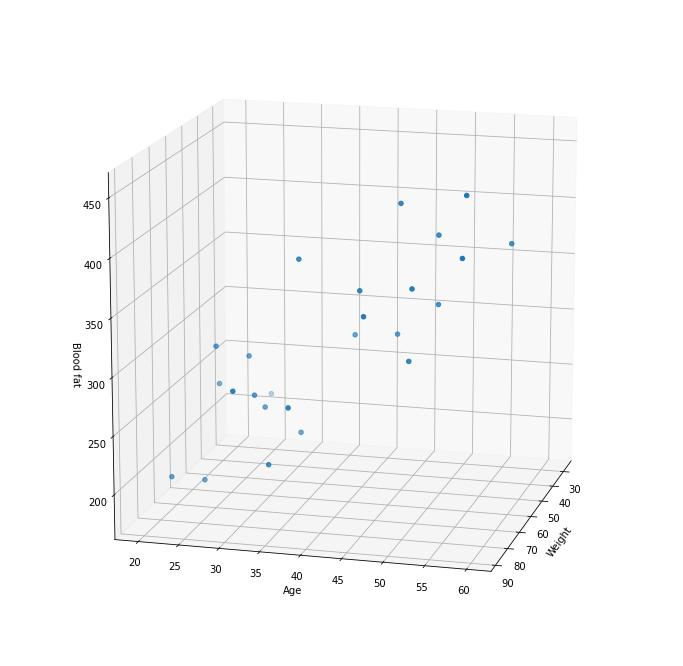

In [158]:
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(x1,x2,y_data)
ax.set_xlabel("Weight")
ax.set_ylabel("Age")
ax.set_zlabel("Blood fat")
ax.view_init(15,15)
plt.show()